In [3]:
import sys
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import preprocessing as skp

sys.version

'3.6.5 |Anaconda, Inc.| (default, Apr 26 2018, 08:42:37) \n[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]'

In [4]:
def makephi(T=600,m=20,h=None,sigma=.2,isNormalized=True,isFlat=False):
    if h == None:
        h = T/3
    t = np.arange(T)
    if isFlat:
        x = np.full(T,1./T)
    else:
        i = np.linspace(0,1,m)
        y = (.5**(1/h))**t # halves every h s
        sigma = 0.2
        y_tile = np.tile(y,(len(i),1))
        i_tile = np.tile(i.reshape(-1,1),(1,len(y)))
        u = y_tile-i_tile
        x = np.exp(-u**2/(2*sigma**2))/np.sqrt(2*np.pi)*y_tile
        if isNormalized:
            x = x/np.tile(np.sum(x,axis=0).reshape(-1,1).T,(x.shape[0],1))*m
    return x

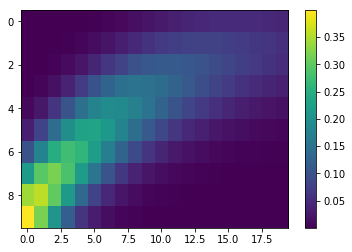

In [185]:
tbf = makephi(m=10,T=20,isNormalized=False)

plt.imshow(tbf,aspect='auto')
plt.colorbar()

In [218]:
kernel = np.random.randn(tbf.shape[0],1)
# kernel = np.ones((tbf.shape[0],1))

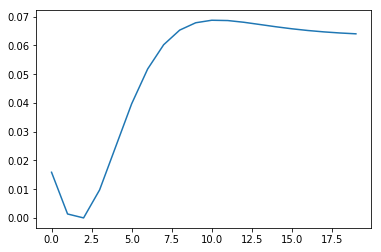

In [187]:
z = skp.normalize(skp.minmax_scale(np.dot(kernel.T,tbf),axis=1),axis=1,norm='l1')

plt.plot(z.ravel())
pass

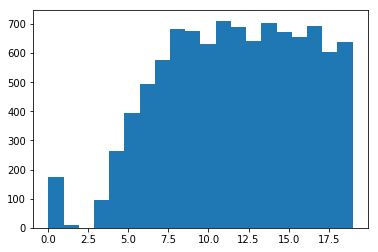

In [188]:
plt.hist(np.random.choice(np.arange(20),10000,p=z.ravel()),bins=20)
pass

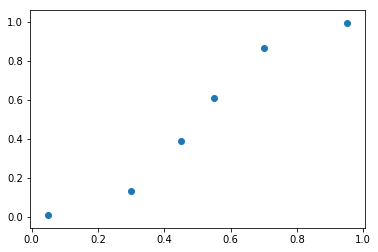

In [189]:
psyc = np.full(np.unique(m).shape,np.nan)
for i,im in enumerate(np.unique(m)):
    psyc[i] = np.mean(mprime[m==im]>.5)

plt.scatter(np.unique(m),psyc)
# plt.plot()

In [190]:
def truncExp(delayDurMean,delayDurMin,delayDurMax):
    delayDur = delayDurMin-1
    while (delayDur < delayDurMin) or (delayDur > delayDurMax):
        delayDur = np.random.exponential(delayDurMean)
    return delayDur

In [191]:
nTrials = 100000

# learnRateCho = .001
learnRateWait = .001
learnRateRho = .0001

pCatch = .1
isCatch = np.random.rand(nTrials) < pCatch

listStim = np.array([.05, .3, .45, .55, .7, .95])
m = np.random.choice(listStim,nTrials)
xi = np.random.randn(nTrials)*.18
mprime = m+xi

isChoiceLeft = mprime>0.5
isChoiceRight = np.logical_not(isChoiceLeft)
isChoiceCorrect = (m>0.5)==isChoiceLeft
isRewarded = np.full(nTrials,False)

waitingTime = np.full(nTrials,np.nan)
waitingTime[0] = np.random.choice(np.arange(tbf.shape[1]),1,p=skp.normalize(skp.minmax_scale(np.dot(kernel.T,tbf),axis=1),axis=1,norm='l1').ravel()).item()

feedbackTime = np.full(nTrials,np.nan)
feedbackTime[0] = truncExp(1.5,.5,8)

rho = np.full(nTrials,np.nan)
rho[0] = 0

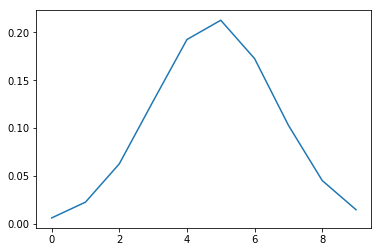

In [193]:
plt.plot(tbf[:,int(waitingTime[iTrial])])

In [ ]:
for iTrial in range(nTrials):
    ## S
    # m = np.random.choice(listStim,nTrials)
    # xi = np.random.randn(nTrials)*.18
    # mprime = m+xi
    
    ## A
    # isChoiceLeft = mprime>0.5
    # isChoiceRight = np.logical_not(isChoiceLeft)
    
    ## R
    # isChoiceCorrect = (m>0.5)==isChoiceLeft
    # isCatch = np.random.rand(nTrials) < pCatch   
    
    isRewarded[iTrial] = isChoiceCorrect[iTrial] and not isCatch[iTrial] and waitingTime[iTrial]>feedbackTime[iTrial]

    if iTrial+1==nTrials: break
    
    ## S'
    feedbackTime[iTrial+1] = truncExp(1.5,.5,8)

    ## A'
    tau = feedbackTime[iTrial] if isRewarded[iTrial] else waitingTime[iTrial]
    delta = isRewarded[iTrial].astype(float)-rho[iTrial]*tau
    kernel = kernel + learnRateWait*delta*tbf[:,int(waitingTime[iTrial])].reshape((-1,1))
    rho[iTrial+1] = rho[iTrial] + (1-(1-learnRateRho)**tau)*delta
    
    

# isChoiceRight = np.logical_not(isChoiceLeft)



In [222]:
tau = min(waitingTime[iTrial],feedbackTime[iTrial])

In [225]:
tau

6.0

In [227]:
waitingTime[iTrial]

6.0